# Predicting House Prices Using Regression Models

## Table of Contents

1. [Introduction](#introduction)
2. [Data Exploration](#dataExploration)
    1. [Understanding The Problem](#understandingTheProblem)
    2. [Analyzing SalePrice](#analyzingSalePrice)
    2. [Multivariate Study](#multivariateStudy)
3. [Data Preprocessing](#dataPreprocessing)
    1. [Handling Missing Data](#handlingMissingData)
    2. [Handling Categorical Data](#handlingCategoricalData)
    3. [Outliers](#outliers)
    4. [Normalizing our "SalePrice"](#normalizingOurSalePrice)
    5. [Split The Dataset](#splitTheDataset)
    6. [Feature Scaling](#featureScaling)
4. [Modeling](#modeling)

## 1. Introduction <a name="introduction"></a>

This is my first project in Data Science after following several courses and reading books during the last few months.
It is a Regression problem coming from a begginner's competition on Kaggle.
The goal of this project is to train myself on a real project and improve my skills in Data Exploration and Feature Engineering, mainly.

The Ames Housing Dataset was compiled by Dean De Cock and contains information on houses from Ames, Iowa. The objective is to predict the price of houses.

In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## 2. Data Exploration <a name="dataExploration"></a>

In [521]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [522]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [523]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The training dataset contains 1460 examples and 80 features including our target feature, "SalePrice", corresponding to the price a house was sold.
For the test dataset, it contains 1459 rows and 79 features because the target feature has been deleted.

This is the list of columns containing missing values, in count and percentage :

In [524]:
cols_missing_values_df = {"count" : train.isnull().sum()}
cols_missing_values = pd.DataFrame(cols_missing_values_df)
cols_missing_values = cols_missing_values[cols_missing_values["count"] > 0]
cols_missing_values["%"] = cols_missing_values["count"] / 1460 * 100
cols_missing_values

count          %
LotFrontage     259  17.739726
Alley          1369  93.767123
MasVnrType        8   0.547945
MasVnrArea        8   0.547945
BsmtQual         37   2.534247
BsmtCond         37   2.534247
BsmtExposure     38   2.602740
BsmtFinType1     37   2.534247
BsmtFinType2     38   2.602740
Electrical        1   0.068493
FireplaceQu     690  47.260274
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
GarageCond       81   5.547945
PoolQC         1453  99.520548
Fence          1179  80.753425
MiscFeature    1406  96.301370

Using this list, we can determine which feature to keep in our train dataset, those we can fill with new values and those we have to get rid of.

### 2.1 Understanding The Problem<a name="understandingTheProblem"></a>

First of, let's list all our features with their name, type and importance in respect to our target feature.
This step is very important and will save us time later on when we decide what feature to explore and use whithin our model.

From this classification, we can identify 7 features potentially interesting. Those are :

| Name          | Type        |
|:-------------:|:-----------:|
| GrLivArea     | Numerical   |
| LotArea       | Numerical   |
| 1stFlrSF      | Numerical   |
| TotalBsmtSF   | Numerical   |
| OverallQual   | Categorical |
| YearBuilt     | Categorical |

### 2.2 Analyzing SalePrice<a name="analyzingSalePrice"></a>

Our objective is to predict the price of a house, so we must study our target feature "SalePrice". By acquiring more knowledge on this variable, it will be easier to detect the correlation between the sale price and the other features we have identified.

In [525]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that our variable goes from 34900 to 755000 with a mean of 180921.20.

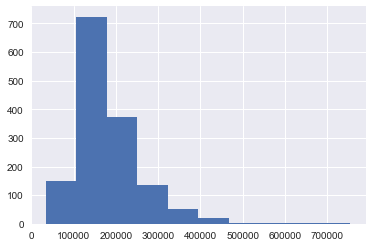

Skewess :  1.88287575977


In [526]:
plt.hist(train["SalePrice"])
plt.show()
print("Skewess : ", train["SalePrice"].skew())

The distribution is positively skewed shown by the longer tail on the right.
"SalePrice" doesn't follow a normal distribution.

Let's apply a log transformation on "SalePrice" to help the data approach the shape a normal distribution.
By doing so, the skewness of our distribution will be closer to 0.

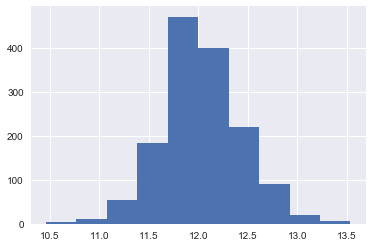

Skewess :  0.121335062205


In [527]:
tempSalePrice = np.log(train["SalePrice"])
plt.hist(tempSalePrice)
plt.show()
print("Skewess : ", tempSalePrice.skew())

### 2.3 Multivariate Study<a name="multivariateStudy"></a>

Now that we've learnt more about our target variable, let's analyze its relation with our main predictors.

#### Numerical variables

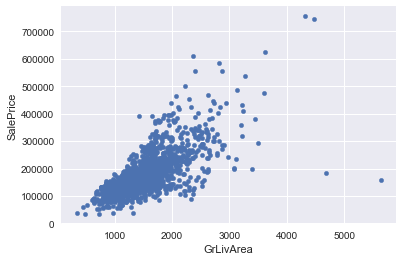

In [528]:
x_col = "GrLivArea"
train[["SalePrice", x_col]].plot.scatter(x=x_col, y="SalePrice")

We can see a positive correlation between those two variables.

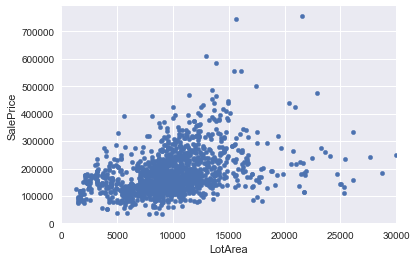

In [529]:
x_col = "LotArea"
train[["SalePrice", x_col]].plot.scatter(x=x_col, y="SalePrice", xlim=(0, 30000))

Due to outliers we have to look at values of LotArea between 0 and 30000.
This is also a positive correlation but it is weaker than the first one.

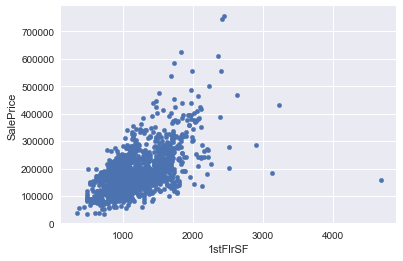

In [530]:
x_col = "1stFlrSF"
train[["SalePrice", x_col]].plot.scatter(x=x_col, y="SalePrice")

Again, there is a positive correlation.

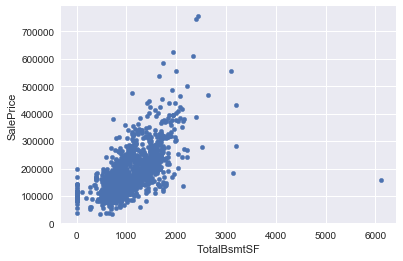

In [531]:
x_col = "TotalBsmtSF"
train[["SalePrice", x_col]].plot.scatter(x=x_col, y="SalePrice")

In this case, the correlation between the two variables is increasing exponentially.

#### Categorical variables

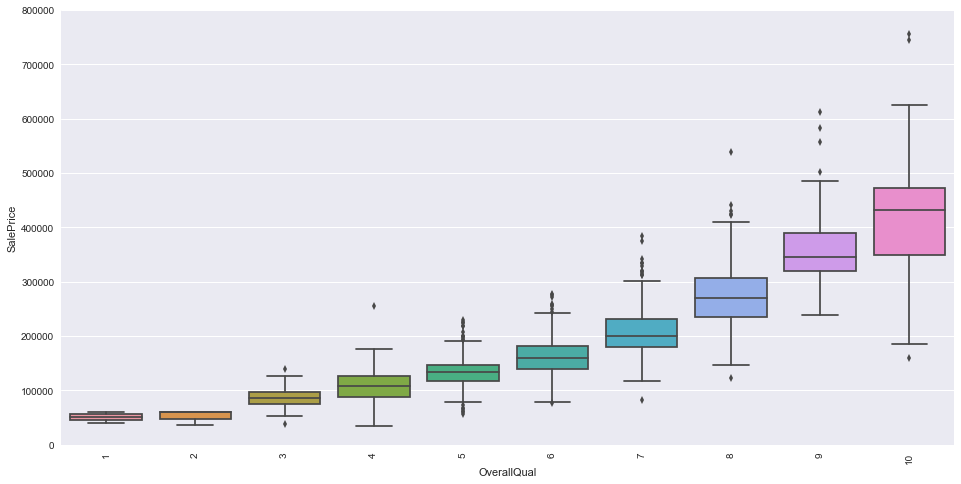

In [532]:
x_col = "OverallQual"
data = pd.concat([train[x_col], train["SalePrice"]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=x_col, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

[TODO]

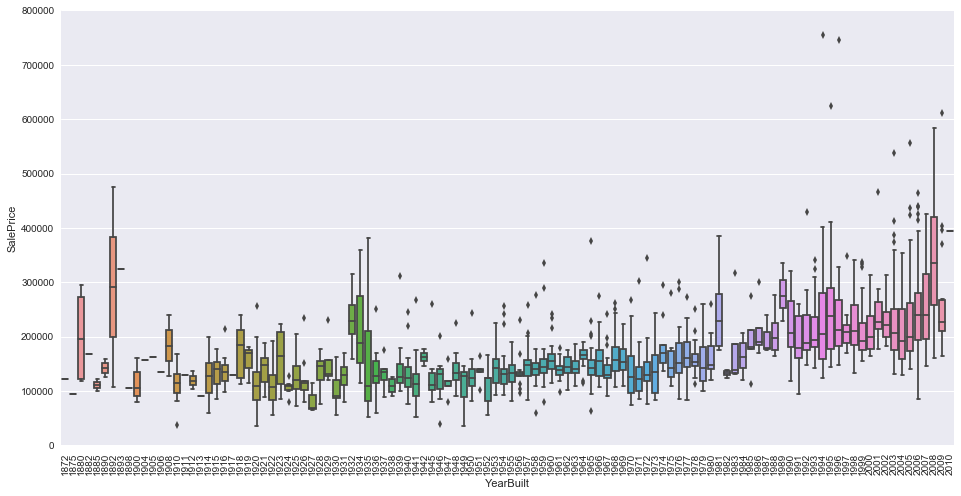

In [533]:
x_col = "YearBuilt"
data = pd.concat([train[x_col], train["SalePrice"]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=x_col, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

[TODO]

#### To Conclude

Out of the four numerical variables, three of them had a positive and important correlation with the sale price.
Those are :
- GrLivArea
- 1stFlrSF
- TotalBsmtSF

Concerning the categorical variables, the "OverallQual" is the most interesting of the three.
The "YearBuilt" is also an interesting choice with a weaker positive correlation.

#### Correlation Matrix

Let's find more features that could interest us to determine sale prices.
By using a heatmap, we can find correlation between variables.

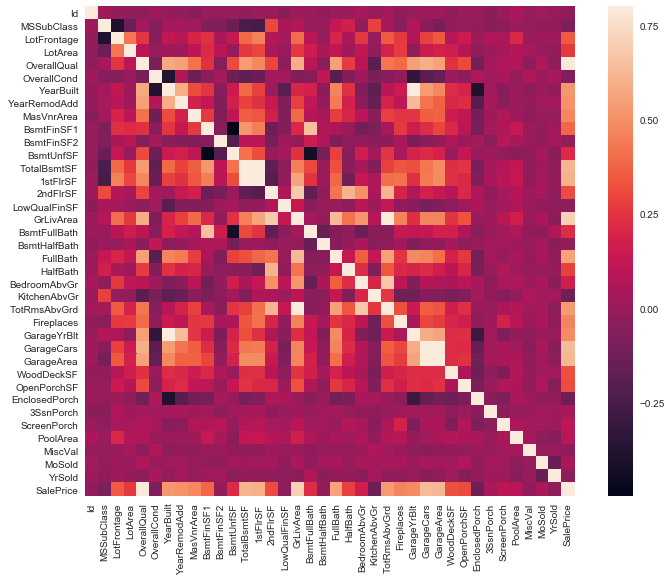

In [534]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

On this heatmap, we can verify some of our assumptions and guess work about our first variables. We find them here too, but there is also new and interesting variables.

Like "1stFlrSF" which correlates nicely with "TotalBsmtSF" and the three variables "GarageYrBlt", "GarageCars" and "GarageArea".

Some other variables have a high correlation because they are somehow dependent of each other, like the "YearBuilt" and the "GarageYrBlt". It is safe to assume that the garage was constructed in the same time as the house.

Moreover, this matrix shows us all the variables which correlates with our "SalePrice" and this includes the features we have identified previously. Let's explore these variables more precisely.

#### Correlation Matrix On SalePrice

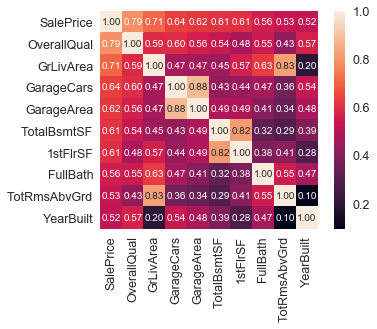

In [535]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

This matrix is easier to find correlation with our target variable "SalePrice".

We find again our most important features : "OverallQual", "GrLivArea", "TotalBsmtSF".

There are 3 pairs of variables that we need to be careful with, those are :
- "GarageCars" and "GarageArea". Those variables are highly correlated due to the fact that a larger area allows more cars to fit in a garage. Selecting these two variables wouldn't help us, because they represent nearly the same thing, so we must use only one of them.
- "GrLivArea" and "TotRmsAbvGrd".
- "1stFlrSF" and "TotalBsmtSF"
Those three pairs of variables represent a situation of multicollinearity.

The last two variables are "FullBath" and "YearBuilt".

It leaves us with 4 variables : "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath" and "YearBuilt".

#### Scatter Plots

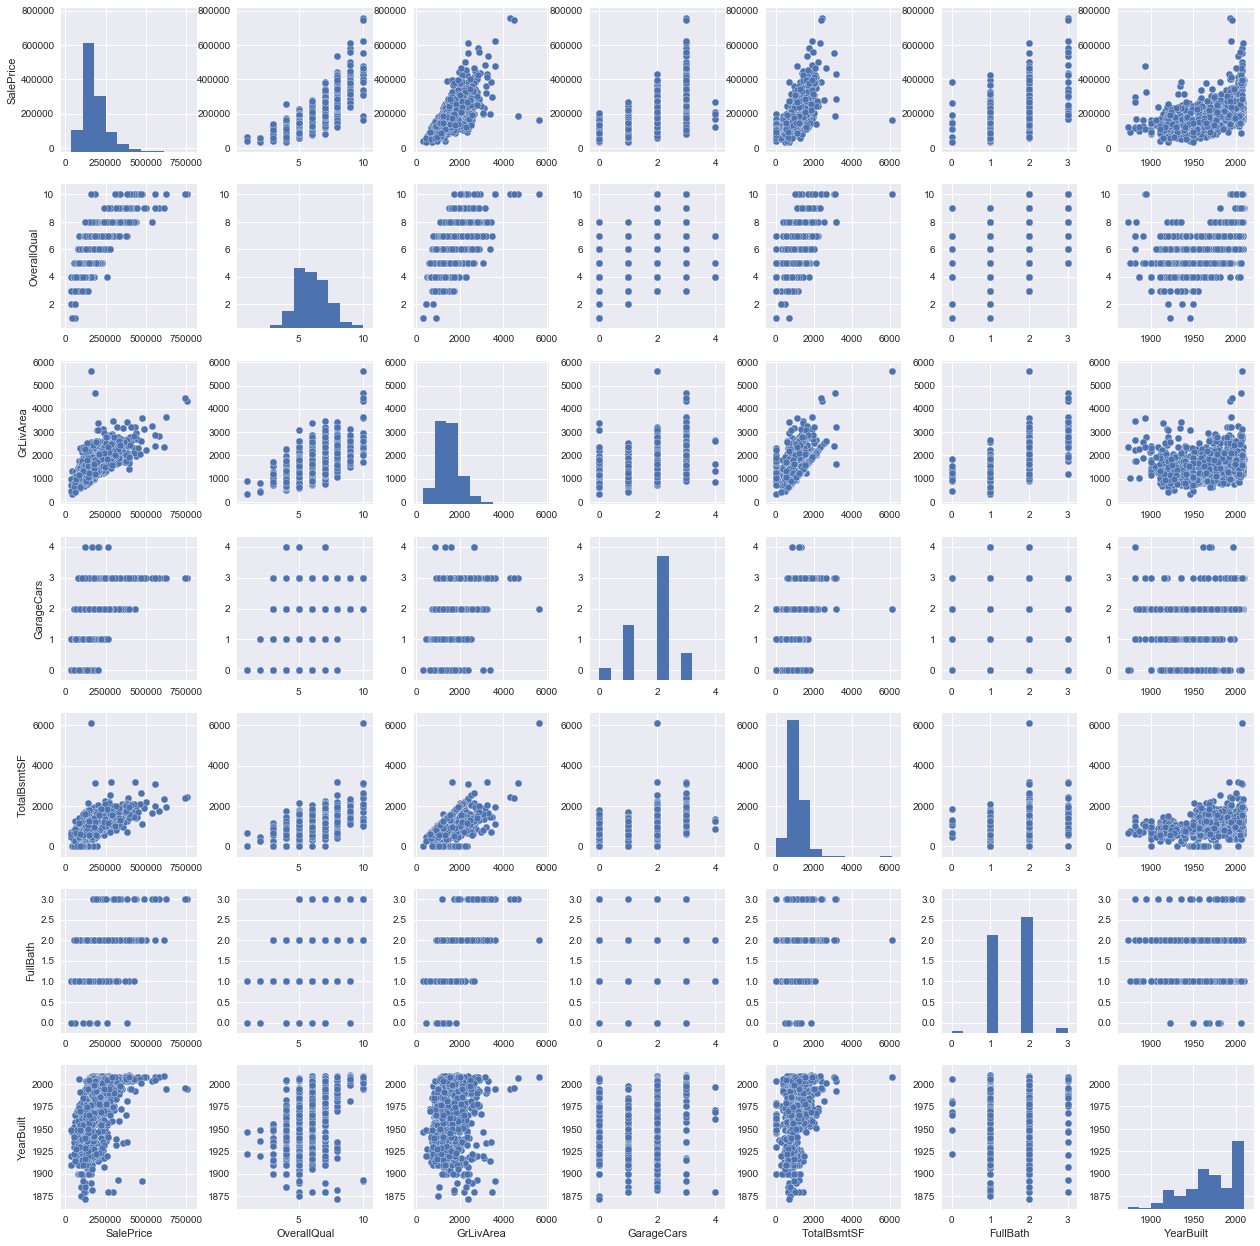

In [536]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

Scatter Plots help us find more useful information about our data.

## 3. Data Preprocessing <a name="dataPreprocessing"></a>

### 3.1 Handling Missing Data <a name="handlingMissingData"></a>

In [537]:
missing_values_count = train.isnull().sum().sort_values(ascending=False)
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_percent = missing_values_count / 1460 * 100
missing_values = pd.concat([missing_values_count, missing_values_percent], axis=1, keys=["Count", "Percent"])
missing_values

Count    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageCond       81   5.547945
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtFinType1     37   2.534247
BsmtCond         37   2.534247
BsmtQual         37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493

As we can see, some of those variables have a lot of missing values (more than 15%).
It is the case for "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu" and "LotFrontage".
We can delete those variables from our dataset.

Then, there is 5 variables in relation with the Garage which have around 5% of their values missing.
We already have selected "GarageCars" for our features and this variable suffice to give enough information on our dataset.
The same thing can be done with the basement variables, so we can delete it too.

Finally, it leaves us with three variables : "MasVnrArea", "MasVnrType" and "Electrical". Those three variables have a few missing values, we are going to delete the first two because there are not relevant in our analysis.
For the last variable, we will just delete the observation corresponding to the missing value.

In [538]:
# Replace all missing values by the mean
data = train.select_dtypes(include=[np.number]).interpolate().dropna() 

### 3.2 Handling Categorical Data <a name="handlingCategoricalData"></a>

In [539]:
# Feature Engineering (Street)
#data['enc_street'] = pd.get_dummies(data["Street"], drop_first=True)
#test['enc_street'] = pd.get_dummies(test["Street"], drop_first=True)

# Feature Engineering (SaleCondition)
def encode(x): return 1 if x == 'Partial' else 0
#data["enc_condition"] = data["SaleCondition"].apply(encode)
#test["enc_condition"] = test["SaleCondition"].apply(encode)

## TODO ##

### 3.3 Outliers <a name="outliers"></a>

Our "SalePrice" variable has a few outliers that we should take care off. We can see them easily with a scatter plot.

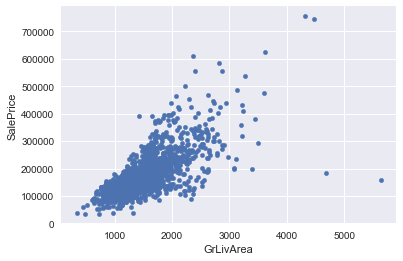

In [540]:
x_col = "GrLivArea"
data[["SalePrice", x_col]].plot.scatter(x=x_col, y="SalePrice")

There is 4 observations that seem to be outliers :
- Two of them having a large "GrLivArea" and a low sale price. Those observations doesn't seem to follow the tendancy of the curve. We should delete them.
- The other two are far away from the other observations but seem to follow the tendancy, so we should keep them.

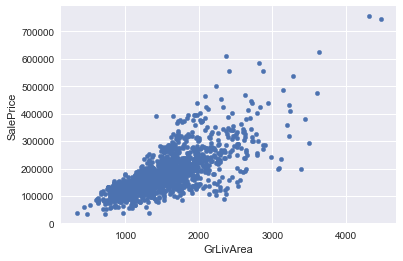

In [541]:
data = data[data["GrLivArea"] < 4600]
x_col = "GrLivArea"
data[["SalePrice", x_col]].plot.scatter(x=x_col, y="SalePrice")

In [542]:
data = data[data["GarageArea"] < 1200]

Doing the same thing on "GarageArea".

### 3.4 Normalizing our "SalePrice" <a name="normalizingOurSalePrice"></a>

Our data doesn't follow a normal distribution. We are going to improve that to better fit our model.

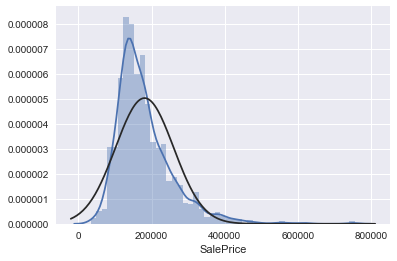

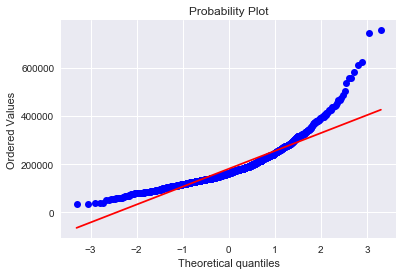

In [543]:
from scipy import stats
from scipy.stats import norm

sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

"SalePrice" is not normal. It's shape would be more like a bell curve if it was.
But, by applying a log transformation on our data, we can be closer to a normal distribution.

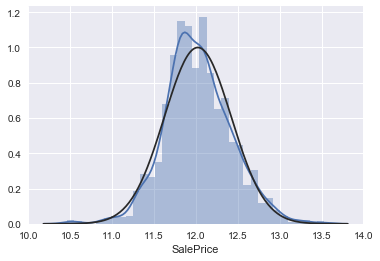

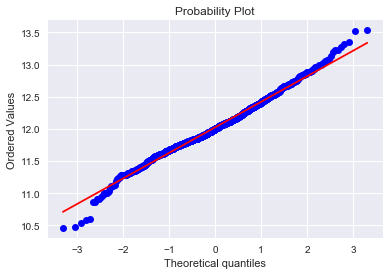

In [544]:
data['SalePrice'] = np.log(data['SalePrice'])

sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

Now, we can continue this transformation on other variables.

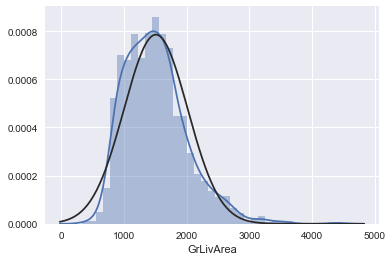

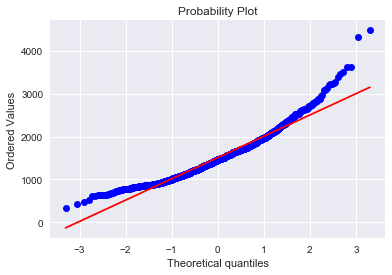

In [545]:
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

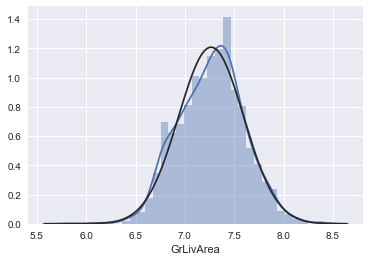

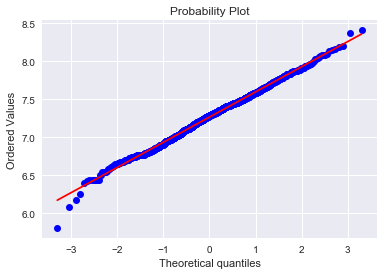

In [546]:
data['GrLivArea'] = np.log(data['GrLivArea'])

sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

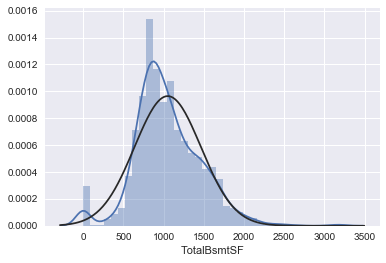

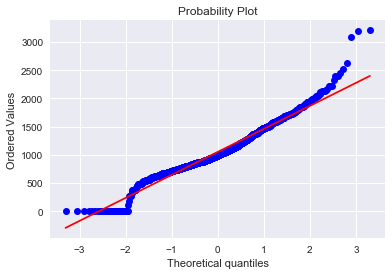

In [547]:
sns.distplot(data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['TotalBsmtSF'], plot=plt)

For this variable, some of our observations have a zero value.
Thus, we can't apply our log transformation.

However, we can apply our transformation on all our non-zero values and leave the rest as it is.

C:\Users\steyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


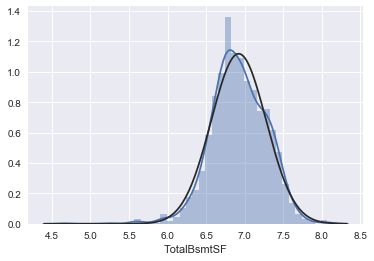

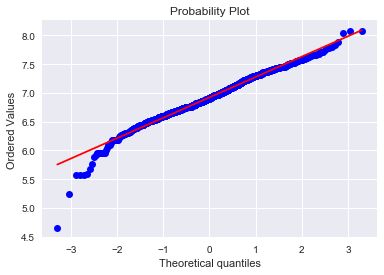

In [548]:
data['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=data.index)
data['HasBsmt'] = 0 
data.loc[data['TotalBsmtSF'] > 0,'HasBsmt'] = 1

data.loc[data['HasBsmt']==1,'TotalBsmtSF'] = np.log(data['TotalBsmtSF'])

sns.distplot(data[data['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data[data['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

In [549]:
## TODO ##

log_cols = ["1stFlrSF", "LotArea", "LotFrontage"]

for col in log_cols:
    data[col] = np.log1p(data[col])

### 3.5 Split The Dataset <a name="splitTheDataset"></a>

In [550]:
from sklearn.model_selection import train_test_split

X = data.drop(["Id", "SalePrice"], axis=1)
y = data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3.6 Feature Scaling <a name="featureScaling"></a>

## 4. Modeling <a name="modeling"></a>

### 4.1 Model Building <a name="modelBuilding"></a>

In [551]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_linearRegression(Xtrain, Xtest, ytrain, ytest):
    lr = LinearRegression()
    lr.fit(Xtrain, ytrain)
    predictions = lr.predict(Xtest)

    return lr.score(Xtest, ytest), mean_squared_error(ytest, predictions)

In [552]:
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "1stFlrSF", "2ndFlrSF", "LotArea", "KitchenAbvGr"]

train_linearRegression(X_train, X_test, y_train, y_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 4.2 Test Dataset Transformations

In [553]:
test = pd.read_csv("data/test.csv")

# Log
log_cols = ["GrLivArea"]
for col in log_cols:
    test[col] = np.log(test[col])

test['HasBsmt'] = pd.Series(len(test['TotalBsmtSF']), index=test.index)
test['HasBsmt'] = 0 
test.loc[test['TotalBsmtSF'] > 0,'HasBsmt'] = 1

test.loc[test['HasBsmt'] == 1,'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])

test.loc[1116, "GarageCars"] = test["GarageCars"].mean()

# Log1p
log1p_cols = ["1stFlrSF", "LotArea", "LotFrontage"]
for col in log1p_cols:
    test[col] = np.log1p(test[col])

# Missing values + Drop "Id"
test_transformed = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

C:\Users\steyf\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [554]:
predictions = lr.predict(test_transformed)

submission = pd.DataFrame()
submission["Id"] = test["Id"]
submission["SalePrice"] = np.exp(predictions)
submission.to_csv("predictions.csv", index=False)

### 4.2 Model Tuning <a name="modelTuning"></a>